# Problem 5.9

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

In [2]:
def logistic(x, mu):
    return 4 * mu * x * (1 - x)

In [3]:
x0 = 0.75
n_iters = 300
epsilon = 1e-14

In [4]:
trajectory_1 = []
trajectory_2 = []

x = x0
for _ in range(n_iters):
    x = logistic(x, mu=0.9)
    trajectory_1.append(x)

x = x0 + epsilon
for _ in range(n_iters):
    x = logistic(x, mu=0.9)
    trajectory_2.append(x)

In [5]:
trajectory_1 = np.array(trajectory_1)
trajectory_2 = np.array(trajectory_2)

In [6]:
divergence = np.abs(trajectory_1 - trajectory_2)

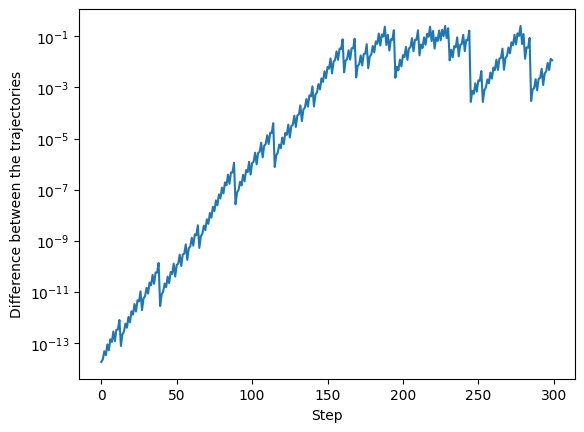

In [7]:
plt.plot(divergence)
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Difference between the trajectories');

The divergence grows by roughly an order of magnitude every 15 steps.

The divergence stops growing onec it has reached of order the size of the space because then there is no further growith in the divergence.  At that point the mixing events are occurring independently in each trajectory and the trajectories can no longer be considered similar.

In [8]:
model = sklearn.linear_model.LinearRegression()
model.fit(np.arange(125)[:, None], np.log(divergence)[:125, None])

LinearRegression()

In [9]:
model.coef_

array([[0.1689467]])

In [10]:
1 / model.coef_

array([[5.91902646]])

The Lyapunov exponent is approximately 0.1689, and so the e-folding time is about 6 steps.

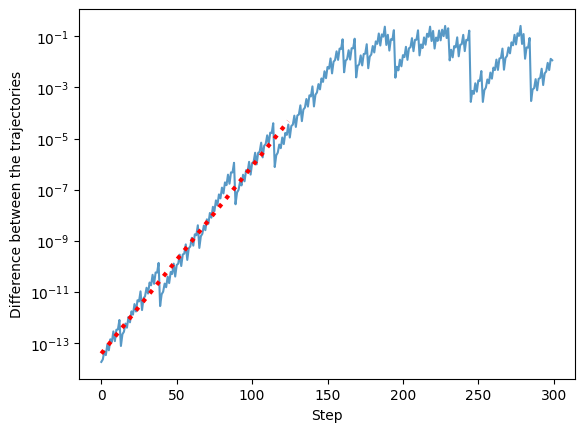

In [11]:
plt.plot(divergence, alpha=0.75)
plt.plot(
    np.arange(125),
    np.exp(model.coef_[0] * np.arange(125) + model.intercept_[0]),
    color='r',
    linestyle=':',
    linewidth=3,
)
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Difference between the trajectories');